In [60]:
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import glob
from scipy.optimize import curve_fit
%matplotlib inline

%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = (12, 8)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
cd ..

C:\Users\Benjamin\PycharmProjects\Mastercode


In [28]:
len(glob.glob(match))

48

In [40]:
match = "correlation_PBC*.npz"
N = len(glob.glob(match))

temps = []
correlation_f = []
first_term = []
for filename in glob.glob(match):
    d = np.load(filename)
    temps.append(d["temp"])
    correlation_f.append(d["correlation_f"])
    first_term.append(d["first_term"])

(0, 12)

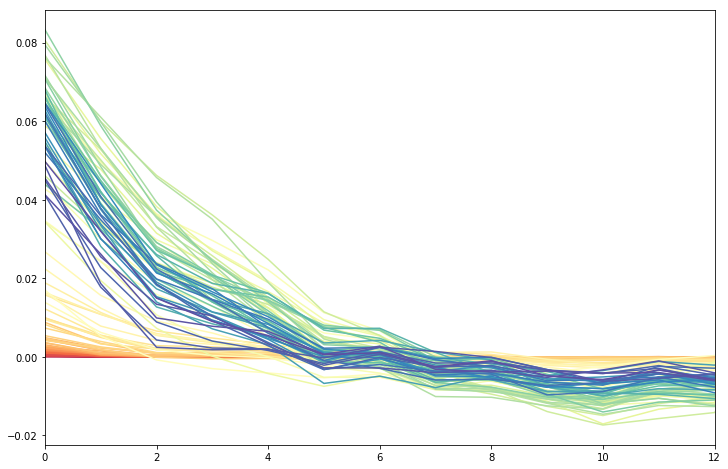

In [87]:
correlation_lengths = np.zeros((N))
col = plt.cm.Spectral(np.linspace(0,1,N))
for t, c, ft, i in zip(temps, correlation_f, first_term, range(N)):
    corr = np.mean(c, axis=0)
    ft = np.mean(ft, axis=0)
    
    r = np.arange(12)
    fit = curve_fit(lambda t,A,l: A*np.exp(-t/l),  r,  ft[:12])
    correlation_lengths[i] = fit[0][1]

    #if t > 3.4:
    plt.plot(corr, c=col[i,:], label=np.round(t,2))
#plt.legend(loc='right')
plt.xlim([0,12])

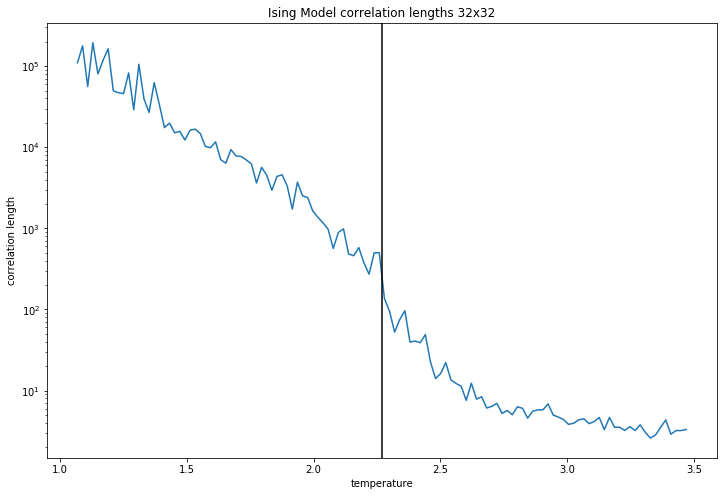

In [89]:
plt.semilogy(temps, correlation_lengths)
plt.axvline(2.269, c='k')
plt.title("Ising Model correlation lengths 32x32")
plt.xlabel("temperature")
plt.ylabel("correlation length")

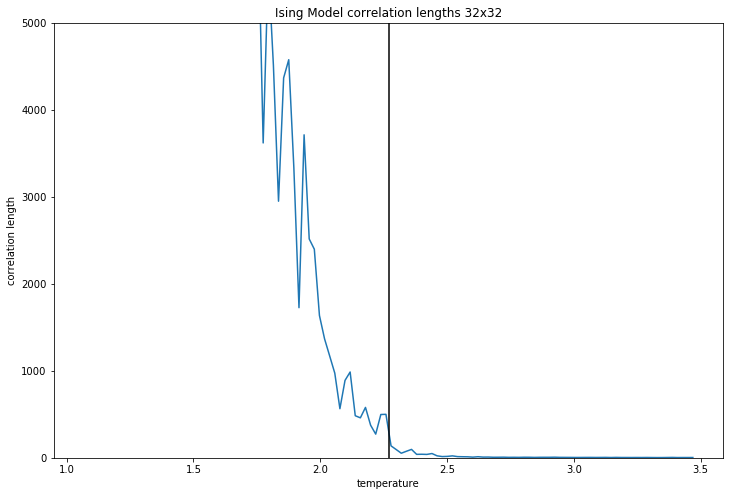

In [90]:
plt.plot(temps, correlation_lengths)
plt.ylim(0,5000)
plt.axvline(2.269, c='k')
plt.title("Ising Model correlation lengths 32x32")
plt.xlabel("temperature")
plt.ylabel("correlation length")

## critical exponents

(array([ 1.05880972]), array([[ 0.00033473]]))
[ 0.01829558]


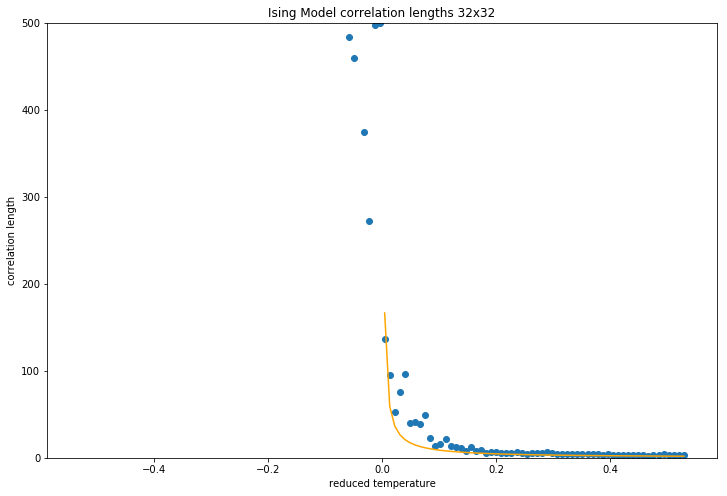

In [119]:
rtemp = (np.array(temps)-2.269)/2.269
start = 0

fit = curve_fit(lambda rt,nu: rt**(-1/nu),  rtemp[rtemp>0],  correlation_lengths[rtemp>0], p0=1)
print(fit)
nu = fit[0][0]

print(np.sqrt(fit[1][0]))

plt.scatter(rtemp, correlation_lengths)
plt.plot(rtemp[rtemp>0], rtemp[rtemp>0]**(-1/nu), c='orange')
plt.ylim(0,500)
plt.title("Ising Model correlation lengths 32x32")
plt.xlabel("reduced temperature")
plt.ylabel("correlation length")